In [1]:
#Importing Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Read the stroke data from a CSV file into a pandas DataFrame
data_stroke_DT = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data_stroke_DT

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data_stroke_DT = data_stroke_DT.drop('id', axis=1)

In [5]:
data_stroke_DT

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#View null and non null colomns
data_stroke_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
#preprocessing null values
#replace BMI null values into mean BMI value
data_stroke_DT['bmi'].fillna(data_stroke_DT['bmi'].mean(), inplace=True)

In [8]:
#checks the null values
data_stroke_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
#View whole dataset
data_stroke_DT

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [10]:
#Check total values in Gender fields
data_stroke_DT['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
#Check total categorical values in ever_married field
data_stroke_DT['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
#Check total categorical values in work_type field
data_stroke_DT['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
#Check total categorical values in Residence_type field
data_stroke_DT['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [14]:
#Check total categorical values in smoking_status field
data_stroke_DT['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [15]:
#replace categorical data into numerical data
replace = {
    "gender": {"Female": 0, "Male": 1, "Other": 2},
    "ever_married": {"Yes": 1, "No": 0},
    "work_type": {"Private": 0, "Self-employed": 1, "children": 2, "Govt_job": 3, "Never_worked": 4},
    "Residence_type": {"Urban": 0, "Rural": 1},
    "smoking_status": {"never smoked": 0, "Unknown": 1, "formerly smoked": 2, "smokes": 3}
}

data_stroke_DT = data_stroke_DT.replace(replace)


In [16]:
data_stroke_DT

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.600000,2,1
1,0,61.0,0,0,1,1,1,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,1,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,0,171.23,34.400000,3,1
4,0,79.0,1,0,1,1,1,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,28.893237,0,0
5106,0,81.0,0,0,1,1,0,125.20,40.000000,0,0
5107,0,35.0,0,0,1,1,1,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,1,166.29,25.600000,2,0


In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scaling
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data_stroke_DT[['age', 'avg_glucose_level', 'bmi']])

# Standard scaling
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(data_stroke_DT[['age', 'avg_glucose_level', 'bmi']])

In [27]:
data_stroke_DT

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.600000,2,1
1,0,61.0,0,0,1,1,1,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,1,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,0,171.23,34.400000,3,1
4,0,79.0,1,0,1,1,1,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,28.893237,0,0
5106,0,81.0,0,0,1,1,0,125.20,40.000000,0,0
5107,0,35.0,0,0,1,1,1,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,1,166.29,25.600000,2,0


In [18]:
#features
xc=['gender','age','hypertension','heart_disease',
    'ever_married', 'work_type', 'Residence_type',
    'avg_glucose_level', 'bmi', 'smoking_status']

#target attribute
y=["1", "0"]

#Store data in all input attribute
all_inputs = data_stroke_DT[xc]

#Store target attribute field
all_classes = data_stroke_DT['stroke']

In [19]:
#split dataset into test and train
(x_train,x_test, y_train, y_test) = train_test_split(all_inputs,all_classes, train_size = 0.7, random_state=1)

In [20]:
#Store decisionTree classifier model into variable
classifier_decisionTree = DecisionTreeClassifier(random_state=0)

In [21]:
#input and output for decision tree model
classifier_decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
#Finding accuracy
score = classifier_decisionTree.score(x_test, y_test)
print(score)

0.903457273320287


In [23]:
pred= classifier_decisionTree.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
#finding predicted y values for testing data
y_test

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
3206    0
719     0
2881    0
568     0
3810    0
Name: stroke, Length: 1533, dtype: int64

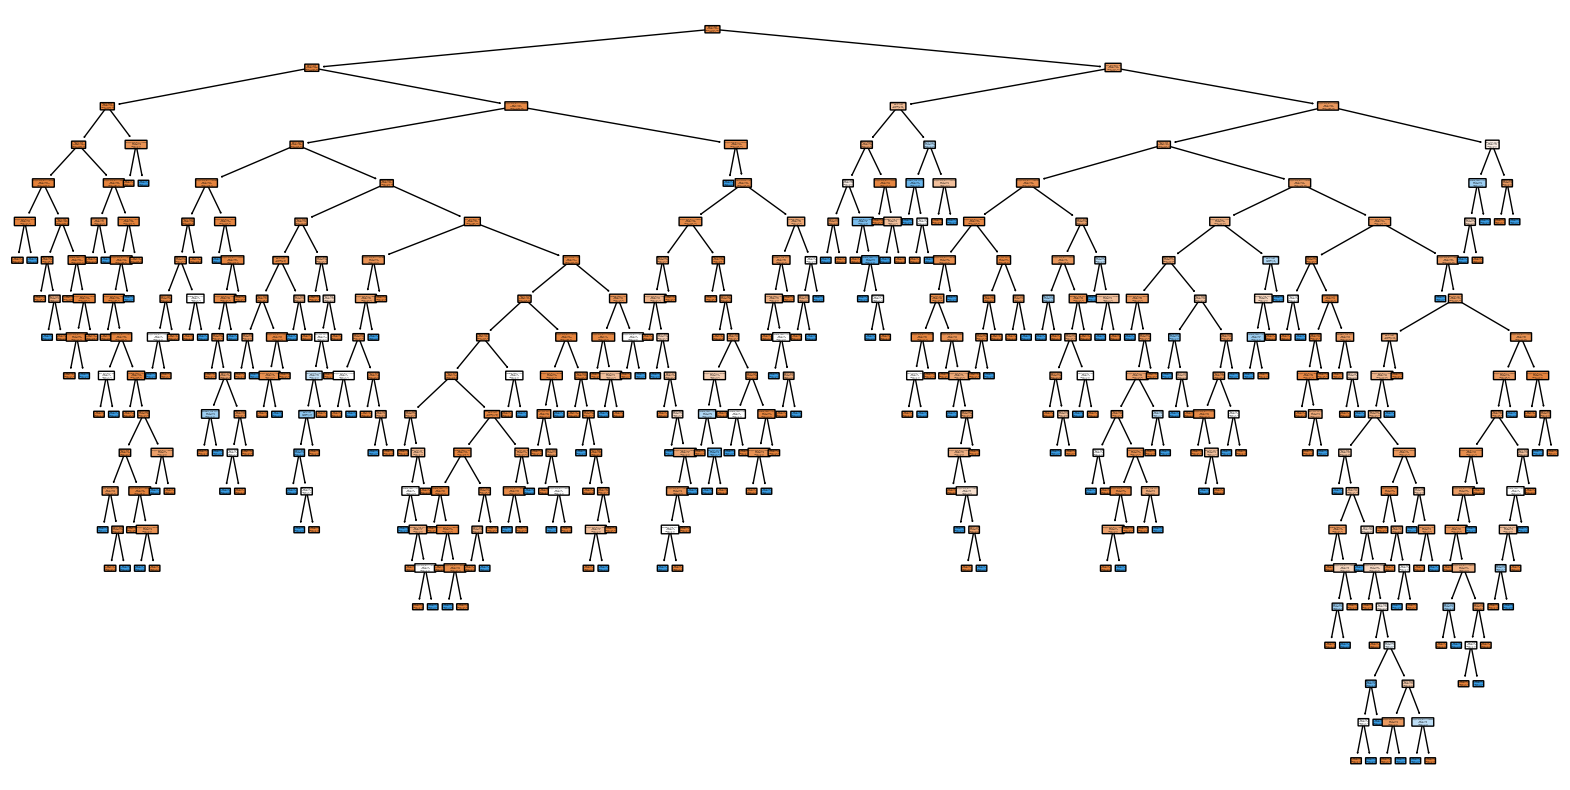

In [25]:
#Decision Tree Image generation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(classifier_decisionTree, filled=True, rounded=True, feature_names=xc, class_names=y)
plt.savefig('DecisionTree.png')

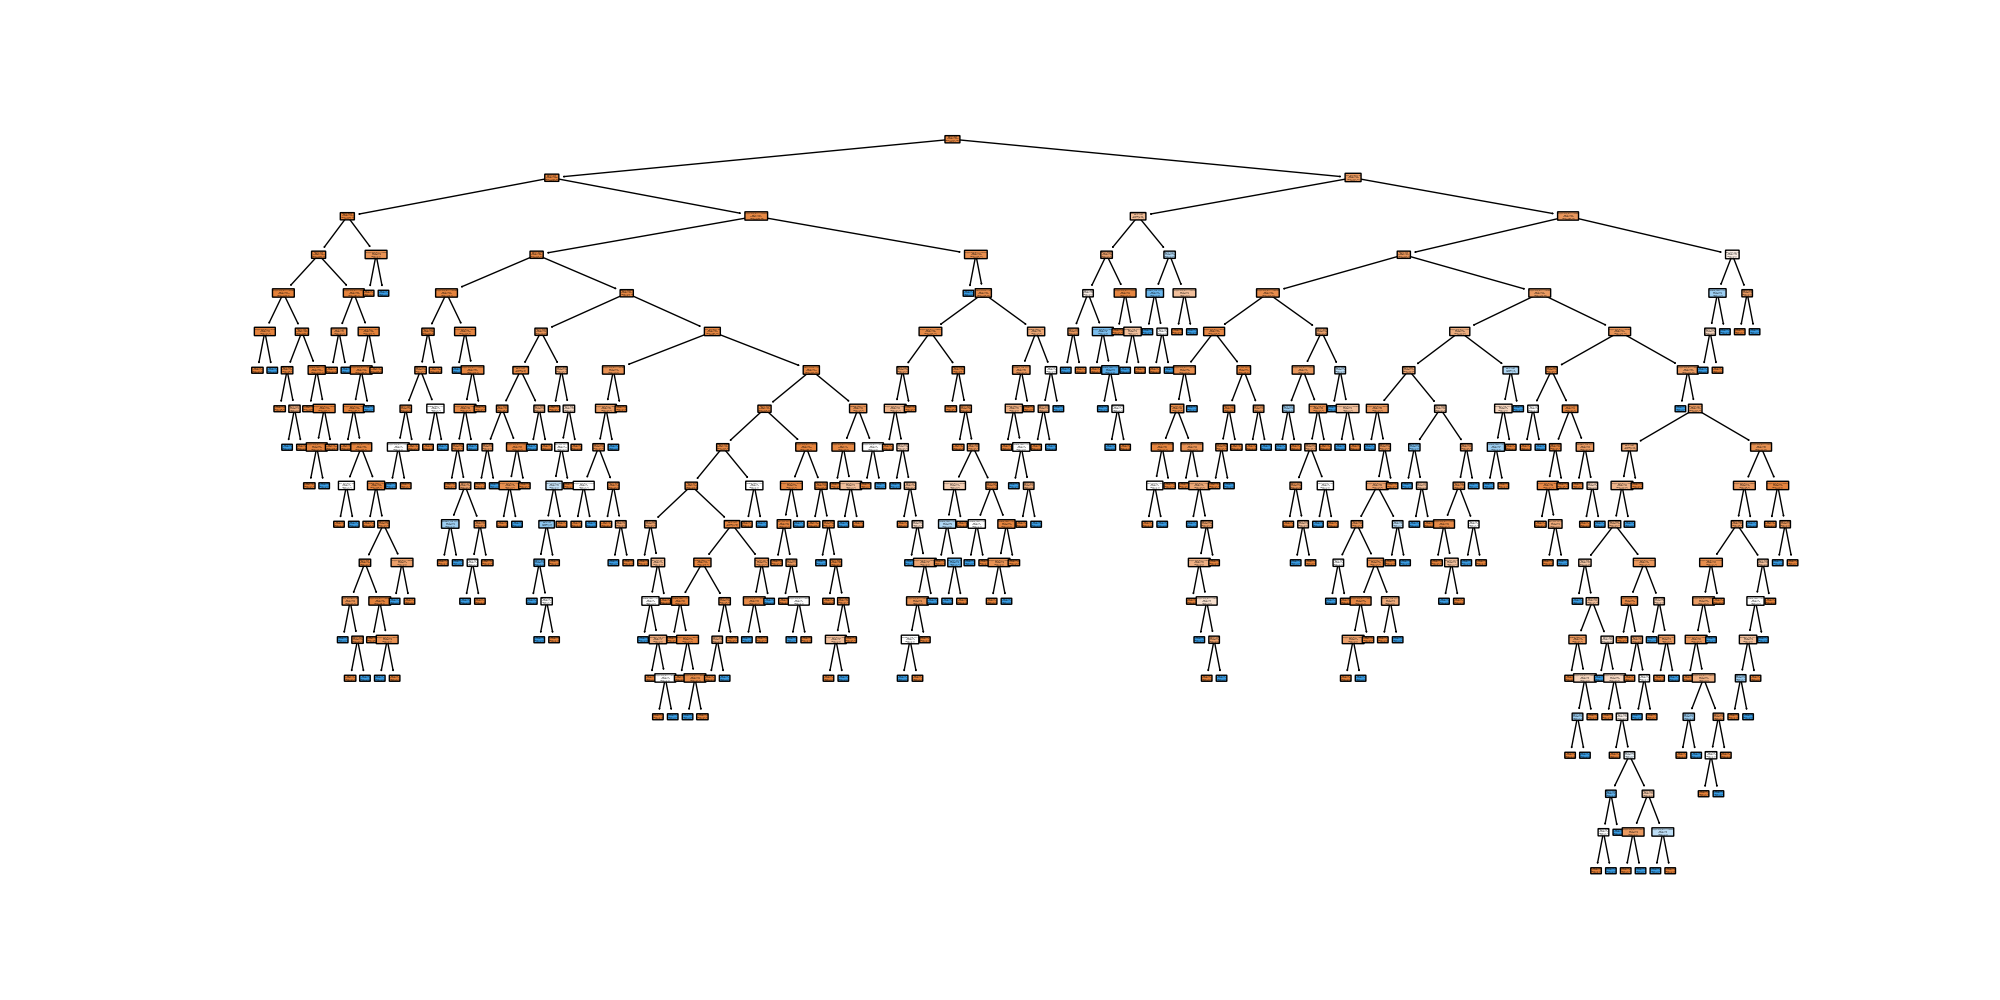

In [26]:
from IPython.display import Image
Image('DecisionTree.png')